In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=True)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(8)


C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Total,%
age,264,20.2
boat,824,62.9
body,1189,90.8
cabin,1015,77.5
embarked,3,0.2
fare,2,0.2
home.dest,565,43.1
name,1,0.1


In [8]:
df[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1.0,0.619195
1,2.0,0.429603
2,3.0,0.255289


In [6]:
df[["sex", "survived"]].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.727468
1,male,0.190985


In [7]:
df[["parch", "survived"]].groupby(['parch'], as_index=False).mean().sort_values(by='survived', ascending=False)

,parch,survived
3,3.0,0.625000
1,1.0,0.588235
2,2.0,0.504425
0,0.0,0.335329
4,4.0,0.166667
5,5.0,0.166667
6,6.0,0.000000
7,9.0,0.000000


## EDA:

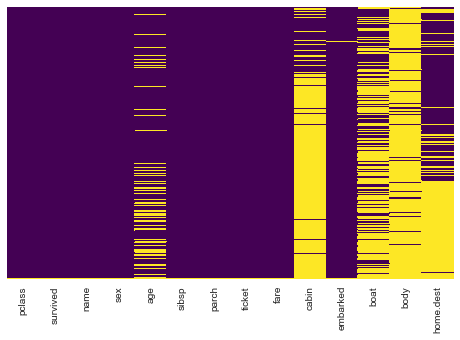

In [68]:
#We can see the columns that have missing values and will deal with it in the next section
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [69]:
##AGE 

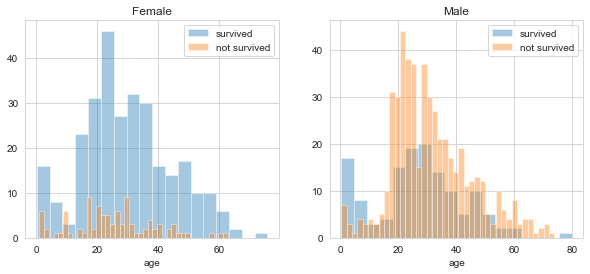

In [70]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['sex']=='female']
men = df[df['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

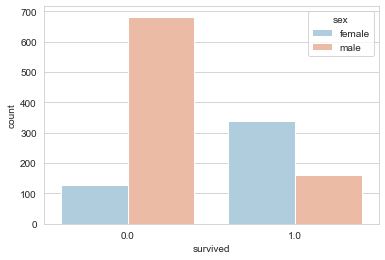

In [71]:
#It shows that from the people who dint survive maximum were males and almost twice females survived!
sns.countplot(x='survived',data=df, hue='sex', palette='RdBu_r')

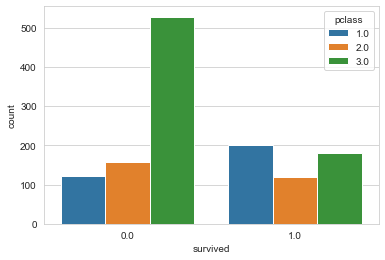

In [72]:
#The third class passangers were amazingly most among Non-Survivors 
sns.countplot(x='survived',data=df, hue='pclass')

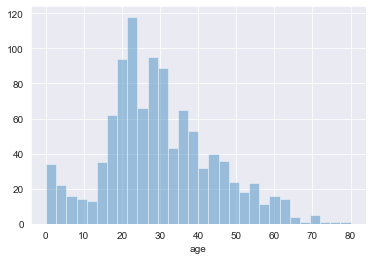

In [73]:
#There were few senior citizens and most people belonged to the younger age group
sns.set_style('darkgrid')

sns.distplot(df['age'].dropna(),kde=False, bins=30)

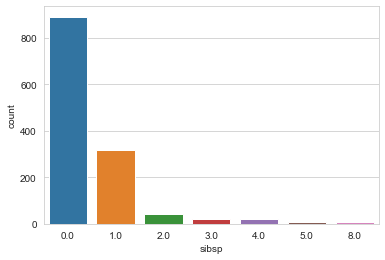

In [74]:
#Category 0 were single's with no spouse or children, Category 1 are probably married couples.
sns.set_style('whitegrid')
sns.countplot(x='sibsp', data=df) 

In [75]:
import cufflinks as cf
cf.go_offline()
df['fare'].iplot(kind='hist', bins=30) #cheap tickets are sold the most as we had seen most passangers were from third class

### Cleaning Data :

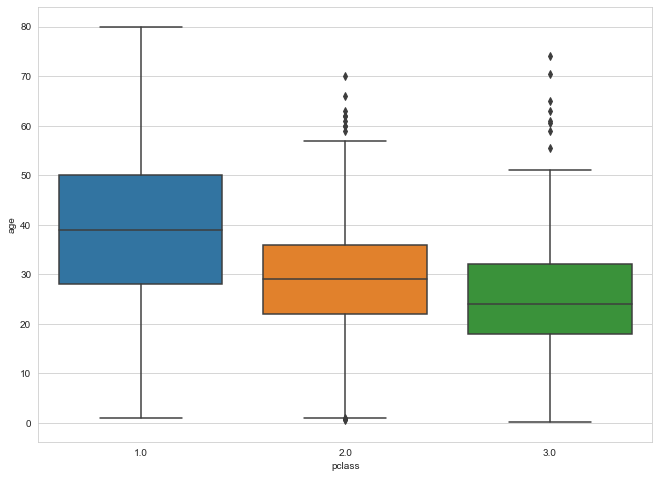

In [76]:
#We can see the wealthier passangers from 1st and 2nd class tend to be older from the passangers in 3rd class 
sns.set_style('whitegrid')
plt.figure(figsize=(11,8))

sns.boxplot(x='pclass', y='age', data=df)

## We can use these average age values depending upon the classes to fill on the missing data!

In [77]:
def fill_age(columns):
    Age = columns[0] #retrieving age value since it was first column when calling
    pclass = columns[1] #retrieving pclass value since it was second column when calling
    
    if pd.isnull(Age):
        #Fill the null values with mean ages based on their classes
        if pclass == 1:
            return 38 
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 24 
    else: #if age is not null then dont change it
        return Age

In [78]:
df['age'] = df[['age','pclass']].apply(fill_age, axis=1) #filling null values with mean ages

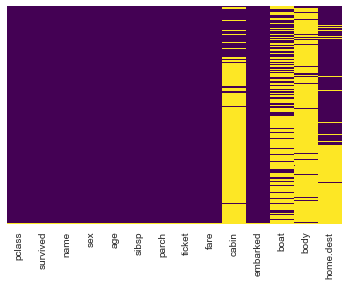

In [79]:
#We have filled all the null values for the age column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [80]:
#There are people who dint survived and their bodies were also not found so this information is hugely missing and hence shall be dropped.
df[(df['survived']==0.0) & (df['body'] != 'NaN')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 2 to 1308
Data columns (total 14 columns):
pclass       809 non-null float64
survived     809 non-null float64
name         809 non-null object
sex          809 non-null object
age          809 non-null float64
sibsp        809 non-null float64
parch        809 non-null float64
ticket       809 non-null object
fare         808 non-null float64
cabin        102 non-null object
embarked     809 non-null object
boat         9 non-null object
body         121 non-null float64
home.dest    398 non-null object
dtypes: float64(7), object(7)
memory usage: 94.8+ KB


C:\Users\ADMIN\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [81]:
# Value at index 1290 and many other values have cases where the person survived but the boat number was not noted. There can be no useful information brought from this column so we will drop it.
df[['survived','boat']].iloc[[1290]]

,survived,boat
1290,1.0,NaN


In [82]:
#Dropping the not useful columns
df.drop('body',axis=1, inplace=True)
df.drop('boat', axis=1, inplace=True)
df.drop('cabin', axis=1, inplace=True)
df.drop('home.dest', axis=1, inplace = True)

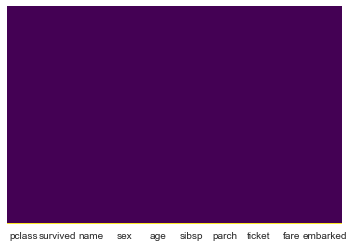

In [83]:
#All the null values have been filled out
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Creating Dummies:

In [84]:
#We drop the first column because then these two columns will become perfect predictors of each other
sex = pd.get_dummies(df['sex'], drop_first=True)
sex.head()

,male
0,0
1,1
2,0
3,1
4,0


In [85]:
# C column is dropped and its value can be obtained when both are 0
embark = pd.get_dummies(df['embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [86]:
pclass = pd.get_dummies(df['pclass'],drop_first=True)
pclass.head()

,2.0,3.0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [87]:
#Adding these columns to the dataframe
df = pd.concat([df,sex,embark,pclass],axis=1)

In [88]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,male,Q,S,2.0,3.0
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,0,0,1,0,0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,1,0,1,0,0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,0,0,1,0,0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,1,0,1,0,0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,0,0,1,0,0


In [89]:
#Dropping pclass,embarked and sex because we have encoded it to other columns

In [90]:
df.drop(['pclass','sex','embarked','name','ticket'], axis=1, inplace = True)

In [91]:
df.dropna(inplace=True)

In [92]:
#Finally we have out data where all columns are numberical perfect for the algorithm
df.head()

,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0
2,0.0,2.0000,1.0,2.0,151.5500,0,0,1,0,0
3,0.0,30.0000,1.0,2.0,151.5500,1,0,1,0,0
4,0.0,25.0000,1.0,2.0,151.5500,0,0,1,0,0


### Performing Analysis

In [93]:
df.columns

Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'male', 'Q', 'S', 2.0,
       3.0],
      dtype='object')

In [95]:
x = df[['age', 'sibsp', 'parch', 'fare', 'male', 'Q', 'S']]
y = df['survived']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
logmodel = LogisticRegression()

In [110]:
logmodel.fit(x_train, y_train)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
predictions = logmodel.predict(x_test)

In [102]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82       240
         1.0       0.72      0.70      0.71       153

    accuracy                           0.78       393
   macro avg       0.76      0.76      0.76       393
weighted avg       0.78      0.78      0.78       393



In [104]:
from sklearn.metrics import confusion_matrix

In [105]:
cm = confusion_matrix(y_test, predictions)
cmatrix = pd.DataFrame(cm, columns=['Predicted:\n NO', 'Predicted:\n YES'], index=['Actual: NO', 'Actual: YES'])
cmatrix

,Predicted: NO,Predicted: YES
Actual: NO,198,42
Actual: YES,46,107


In [ ]:
# Our model had an accuracy of 78% while predicting the cases of survival using Logistic Regression.